IMPORTING LIBRARIES

In [94]:
# !python -m pip install seaborn

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

IMPORTING DATASET

In [7]:
data=pd.read_csv('heart_disease_data.csv')

TAKING CARE OF MISSING VALUES

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

TAKING CARE OF DUPLICATE VALUS

In [9]:
data_dub = data.duplicated().any()

In [10]:
data_dub

True

In [11]:
data = data.drop_duplicates()

In [12]:
data_dub = data.duplicated().any()

In [13]:
data_dub

False

DATA PREEPROCESSING

In [14]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

ENCODING OF CATEGORICAL DATA

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [19]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data, columns=cate_val, drop_first=True)

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


FEATURE SCALING

In [21]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [22]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET

In [24]:
X=data.drop('target', axis=1)

In [25]:
y=data['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

LOGISTIC REGRESSION

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
log=LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred1=log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred1)

0.9016393442622951

SVC

In [38]:
from sklearn import svm

In [39]:
svm=svm.SVC()

In [40]:
svm.fit(X_train, y_train)

SVC()

In [41]:
y_pred2=svm.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred2)

0.8688524590163934

K NEIGBORS CLASSFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier()

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred3=knn.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred3)

0.8688524590163934

In [49]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [50]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

NON LINEAR ML ALGORITHMS

In [51]:
data=pd.read_csv('heart_disease_data.csv')

In [52]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
data=data.drop_duplicates()

In [54]:
data.shape

(302, 14)

In [56]:
X=data.drop('target', axis=1)
y=data['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DECISION TREE CLASSFIER

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt=DecisionTreeClassifier()

In [61]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred4=dt.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred4)

0.8032786885245902

RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred5=rf.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred5)

0.8688524590163934

GRADIENT BOOSTING CLASSIFIER

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc=GradientBoostingClassifier()

In [71]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [74]:
y_pred6=gbc.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred6)

0.8524590163934426

In [76]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5),accuracy_score(y_test, y_pred6)]})

In [77]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.803279
4,RF,0.868852
5,GB,0.852459


In [79]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

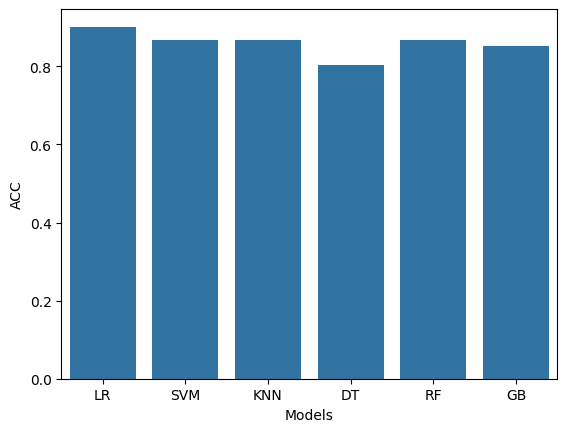

In [82]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [83]:
X=data.drop('target', axis=1)
y=data['target']

In [84]:
X.shape

(302, 13)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf=RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

PREDICTION ON NEW DATA

In [87]:
import pandas as pd

In [88]:
new_data=pd.DataFrame({'age':52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3}, index=[0])

In [89]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [93]:
p=rf.predict(new_data)
if p==1:
    print('Heart Disease')
else:
    print('No Heart Disease')

No Heart Disease


SAVEW MODEL USING JOBLIB

In [95]:
import joblib